In [8]:

!pip install opendatasets
import opendatasets as od
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

In [6]:
od.download("https://www.kaggle.com/competitions/hotel-booking-demand-3/")

100%|██████████| 1.29M/1.29M [00:00<00:00, 102MB/s]


Extracting archive ./hotel-booking-demand-3/hotel-booking-demand-3.zip to ./hotel-booking-demand-3


In [109]:

df = pd.read_csv("/content/hotel-booking-demand-3/train_final.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.00,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.60,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.00,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.00,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.30,0,0,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,0,31,2017,June,26,27,0,1,1,...,D,D,0,No Deposit,0,Transient,119.00,0,2,2017-06-28
44634,Resort Hotel,0,116,2015,September,39,26,2,5,2,...,E,F,0,No Deposit,0,Transient,93.86,0,0,2015-10-03
44635,City Hotel,1,89,2017,April,14,3,1,2,2,...,A,A,0,No Deposit,0,Transient,99.00,0,1,2017-02-09
44636,City Hotel,0,277,2016,September,37,5,2,5,2,...,A,A,0,No Deposit,0,Transient-Party,89.14,0,1,2016-09-12


In [ ]:
df.info()

In [110]:
df=df.drop(['country'],axis=1)
df=df.drop(['reservation_status_date'],axis=1)

In [ ]:
df

In [111]:
df = pd.get_dummies(df, columns=['hotel' ,'arrival_date_month','reserved_room_type','assigned_room_type','deposit_type','market_segment','distribution_channel','customer_type','meal'])

df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,0,3,2016,7,12,0,2,2,0.0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,50,2016,47,18,1,2,2,0.0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,14,2015,37,7,1,5,2,2.0,0,...,1,1,0,0,0,1,0,0,0,0
3,0,18,2015,50,6,2,0,2,0.0,0,...,1,0,0,1,0,1,0,0,0,0
4,1,263,2016,40,29,2,4,2,0.0,0,...,1,0,0,1,0,1,0,0,0,0


In [59]:
df.isna().sum()

is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_week_number         0
arrival_date_day_of_month        0
                                ..
distribution_channel_TA/TO       0
customer_type_Contract           0
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
Length: 71, dtype: int64

In [60]:
df['meal'].value_counts()

BB           34424
HB            5479
SC            4038
Undefined      445
FB             252
Name: meal, dtype: int64

In [112]:

X = df.drop(['is_canceled'], axis = 1)
y = df['is_canceled']

In [113]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

pd.DataFrame(X_st, columns = X.columns)


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,-0.922579,-0.222330,-1.471684,-0.428990,-0.929647,-0.263112,0.254135,-0.260443,-0.090442,-0.187755,...,-2.086211,-0.192437,-0.072905,0.594479,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
1,-0.472752,-0.222330,1.457745,0.252248,0.068347,-0.263112,0.254135,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,0.594479,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
2,-0.817301,-1.640705,0.725388,-0.996687,0.068347,1.292832,0.254135,4.825141,-0.090442,-0.187755,...,0.479338,5.196515,-0.072905,-1.682146,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
3,-0.779017,-1.640705,1.677452,-1.110227,1.066341,-1.300408,0.254135,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,0.594479,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
4,1.565827,-0.222330,0.945095,1.501182,1.066341,0.774184,0.254135,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,0.594479,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,-0.654597,1.196045,-0.080205,1.274103,-0.929647,-0.781760,-1.473304,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,0.594479,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
44634,0.158920,-1.640705,0.871859,1.160564,1.066341,1.292832,0.254135,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,0.594479,-0.531281,0.544712,-0.075349,-0.374054,-0.31537,-0.100347
44635,-0.099491,1.196045,-0.959034,-1.450845,0.068347,-0.263112,0.254135,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,0.594479,-0.531281,-1.835831,-0.075349,-0.374054,3.17088,-0.100347
44636,1.699818,-0.222330,0.725388,-1.223766,1.066341,1.292832,0.254135,-0.260443,-0.090442,-0.187755,...,0.479338,-0.192437,-0.072905,-1.682146,1.882245,-1.835831,-0.075349,2.673407,-0.31537,-0.100347


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.01, random_state=42)

In [122]:
y_train

33337    0
24284    0
38419    0
36558    0
37331    0
        ..
6265     0
11284    0
38158    0
860      0
15795    1
Name: is_canceled, Length: 44191, dtype: int64

In [120]:

from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# создаем модель
# как подобрать лучшее число соседей?
scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

KeyboardInterrupt: ignored

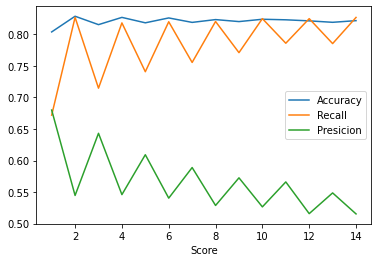

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()
     

In [125]:

knn = KNeighborsClassifier(3)

# обучаем
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:

knn = KNeighborsClassifier(3)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[272,  34],
       [ 46,  95]])

In [126]:
test = pd.read_csv("/content/hotel-booking-demand-3/test_final.csv")
test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,City Hotel,180,2016,May,22,23,1,5,2,0.0,...,A,A,0,No Deposit,0,Transient,80.75,0,0,2016-05-29
23521,City Hotel,4,2016,November,45,1,0,3,1,0.0,...,A,A,0,No Deposit,0,Transient,65.00,0,1,2016-11-04
23522,City Hotel,3,2016,May,21,16,1,1,1,0.0,...,A,A,0,No Deposit,0,Transient,65.00,0,0,2016-05-18
23523,Resort Hotel,312,2017,March,10,5,2,5,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,30.00,0,0,2017-01-11


In [127]:
test=test.drop(['country'],axis=1)
test=test.drop(['reservation_status_date'],axis=1)

In [128]:
test = pd.get_dummies(test, columns=['hotel' ,'arrival_date_month','reserved_room_type','assigned_room_type','deposit_type','market_segment','distribution_channel','customer_type','meal'])

test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,73,2016,28,6,0,2,1,0.0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,37,2015,43,24,2,5,1,1.0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,190,2017,14,6,2,3,2,0.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,287,2016,35,24,1,4,2,0.0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,386,2016,43,20,1,3,2,0.0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_stest = scaler.fit_transform(test)

pd.DataFrame(X_stest, columns = test.columns)


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,-0.462861,-0.232068,0.059016,-1.109345,-0.928225,-0.278773,-1.471895,-0.264110,-0.076003,-0.148861,...,0.391390,-0.179333,-0.056553,0.513185,-0.459150,-1.872389,-0.096264,-0.362253,3.201655,-0.08903
1,-0.778393,-1.636235,1.182209,0.934735,1.073837,1.317270,-1.471895,2.187815,-0.076003,-0.148861,...,0.391390,-0.179333,-0.056553,0.513185,-0.459150,-1.872389,-0.096264,-0.362253,3.201655,-0.08903
2,0.562620,1.172099,-0.989298,-1.109345,1.073837,0.253241,0.199825,-0.264110,-0.076003,-0.148861,...,0.391390,-0.179333,-0.056553,0.513185,-0.459150,0.534077,-0.096264,-0.362253,-0.312338,-0.08903
3,1.412805,-0.232068,0.583172,0.934735,0.072806,0.785255,0.199825,-0.264110,-0.076003,-0.148861,...,-2.554995,-0.179333,-0.056553,0.513185,-0.459150,0.534077,-0.096264,-0.362253,-0.312338,-0.08903
4,2.280520,-0.232068,1.182209,0.480495,0.072806,0.253241,0.199825,-0.264110,-0.076003,-0.148861,...,-2.554995,-0.179333,-0.056553,-1.948616,2.177937,0.534077,-0.096264,-0.362253,-0.312338,-0.08903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,0.474972,-0.232068,-0.390262,0.821175,0.072806,1.317270,0.199825,-0.264110,-0.076003,-0.148861,...,0.391390,-0.179333,-0.056553,0.513185,-0.459150,0.534077,-0.096264,-0.362253,-0.312338,-0.08903
23521,-1.067632,-0.232068,1.331968,-1.677145,-0.928225,0.253241,-1.471895,-0.264110,-0.076003,6.717697,...,-2.554995,-0.179333,-0.056553,0.513185,-0.459150,0.534077,-0.096264,-0.362253,-0.312338,-0.08903
23522,-1.076396,-0.232068,-0.465141,0.026255,0.072806,-0.810787,-1.471895,-0.264110,-0.076003,-0.148861,...,-2.554995,-0.179333,-0.056553,0.513185,-0.459150,0.534077,-0.096264,-0.362253,-0.312338,-0.08903
23523,1.631925,1.172099,-1.288816,-1.222905,1.073837,1.317270,0.199825,-0.264110,-0.076003,-0.148861,...,0.391390,-0.179333,-0.056553,-1.948616,2.177937,0.534077,-0.096264,-0.362253,-0.312338,-0.08903


In [130]:
y_pred = knn.predict(X_stest)

In [99]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [131]:

df=pd.DataFrame(y_pred,columns=['is_canceled'])
df=df.reset_index()
df.to_csv("final.csv",index=False)

In [132]:
test = pd.read_csv("final.csv")
test

,index,is_canceled
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
23520,23520,0
23521,23521,0
23522,23522,0
23523,23523,1


In [100]:
len(y_pred)

23525

In [ ]:
test.isna().sum()

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23525 entries, 0 to 23524
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23525 non-null  object 
 1   lead_time                       23525 non-null  int64  
 2   arrival_date_year               23525 non-null  int64  
 3   arrival_date_month              23525 non-null  object 
 4   arrival_date_week_number        23525 non-null  int64  
 5   arrival_date_day_of_month       23525 non-null  int64  
 6   stays_in_weekend_nights         23525 non-null  int64  
 7   stays_in_week_nights            23525 non-null  int64  
 8   adults                          23525 non-null  int64  
 9   children                        23525 non-null  float64
 10  babies                          23525 non-null  int64  
 11  meal                            23525 non-null  object 
 12  country                         